In [1]:
import GPy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#plotlyアカウントが必要です。matplotlibでプロットする場合はコメントアウトしてください。
GPy.plotting.change_plotting_library('plotly')

/Users/ippei/miniconda3/envs/py36/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [3]:
#乱数の生成
X = np.random.uniform(-5.,5.,(30,1))
y = X +np.sin(X) + np.random.randn(30,1)*0.5

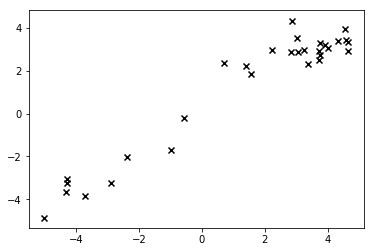

In [4]:
#サンプルデータのプロット
plt.scatter(X,y,marker="x",c ="black")

In [5]:
#線形回帰の実装
f0 = np.array(X)
f1 = np.array([np.sin(i) for i in X])
phi = np.concatenate([f0,f1],axis=1)
#print(phi)
w0 = np.linalg.inv(np.dot((phi.T),phi))
#print(w0.shape)
w1 = np.dot(w0,phi.T)
w = np.dot(w1,y)

(-5, 5)

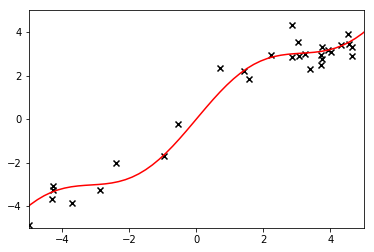

In [6]:
#求めた重みベクトルを用いて予測結果をプロット
def func(x):
    return w[0]*x+w[1]*np.sin(x)
X_pred = np.linspace(-10,10,100)
y_pred = [func(x) for x in X_pred]
plt.scatter(X,y,marker="x",c ="black")
plt.plot(X_pred,y_pred,c="red")
plt.xlim(-5,5)
plt.ylim(-5,5)

In [7]:
#ガウス過程に用いるカーネルの設定
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [8]:
#モデルの設定
m = GPy.models.GPRegression(X,y,kernel)

In [9]:
#モデルのパラメータが見れます
print(m)


Name : GP regression
Objective : 53.68407079568483
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [10]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


In [11]:
#ガウス過程回帰の結果をプロット
fig = m.plot()
GPy.plotting.show(fig, filename="basic_gp_reg")

This is the format of your plot grid:
[ (1,1) x1,y1 ]



/Users/ippei/miniconda3/envs/py36/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


/Users/ippei/miniconda3/envs/py36/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/Users/ippei/miniconda3/envs/py36/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



/Users/ippei/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



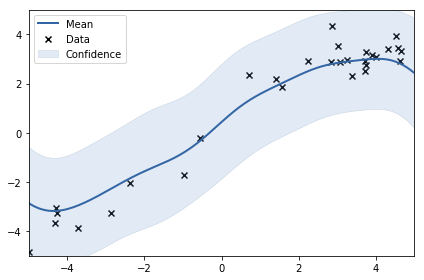

In [12]:
#matplotlib出力
GPy.plotting.change_plotting_library('matplotlib')
m.plot()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [13]:
#パラメータの最適化
m.optimize(messages=True)

In [14]:
#パラメータ最適化後の結果をプロット
GPy.plotting.change_plotting_library('plotly')
fig = m.plot()
GPy.plotting.show(fig, filename="basic_gp_reg")

This is the format of your plot grid:
[ (1,1) x1,y1 ]



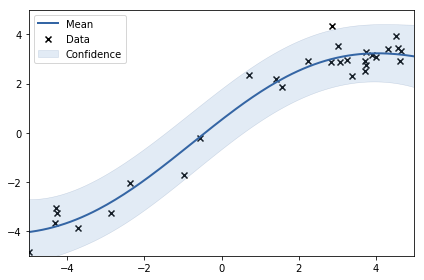

In [15]:
#matplotlib出力用
GPy.plotting.change_plotting_library('matplotlib')
m.plot()
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [16]:
#誤差抜きのサンプルデータ作成用関数
def true_func(x):
    return x+np.sin(x)
true_y = [true_func(x) for x in X_pred]

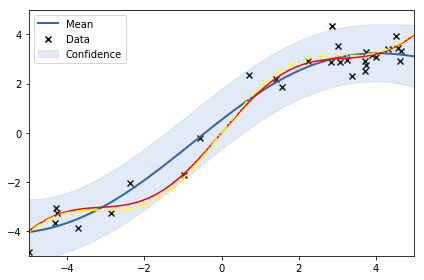

In [17]:
#真値、線形回帰の予測、ガウス過程回帰の結果をプロット
GPy.plotting.change_plotting_library('matplotlib')
m.plot()
plt.plot(X_pred,y_pred,c="red")
plt.plot(X_pred,true_y,c="yellow",linestyle="dashdot")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [18]:
#基底関数を変えた場合
f0_2 = np.array([i**2 for i in X])
f1_2 = np.array([i**3 for i in X])
phi_2 = np.concatenate([f0_2,f1_2],axis=1)
w0_2 = np.linalg.inv(np.dot((phi_2.T),phi_2))
#print(w0_2.shape)
w1_2 = np.dot(w0_2,phi_2.T)
w_2 = np.dot(w1_2,y)
#print(w_2)

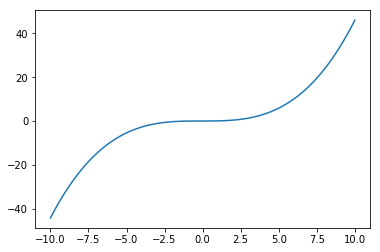

In [19]:
def func2(x):
    return w_2[0]*(x**2)+w_2[1]*(x**3)
y_pred2 = [func2(x) for x in X_pred]
plt.plot(X_pred,y_pred2)

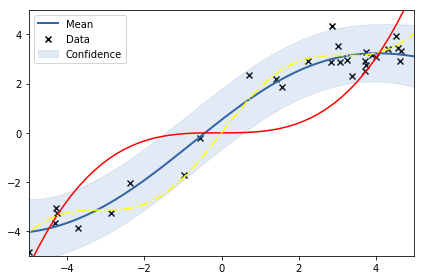

In [20]:
#真値、線形回帰の予測、ガウス過程回帰の結果を再度プロット
m.plot()
plt.plot(X_pred,y_pred2,c="red")
plt.plot(X_pred,true_y,c="yellow",linestyle="dashdot")
#plst.plot
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

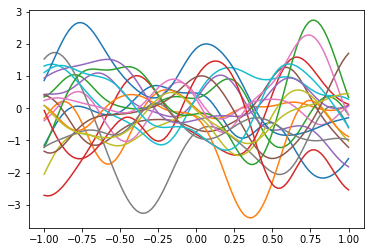

In [21]:
#付録:カーネルから関数をサンプリングする様子
kernel3 = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=0.2)
np.random.seed(seed=1234)
N = 100
x_lin = np.linspace(-1,1,N)
x_lin = x_lin[:,None]
mu = np.zeros(N)
cov = kernel3.K(x_lin,x_lin)
y_lin = np.random.multivariate_normal(mu,cov,size=20)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(20):
    ax.plot(x_lin[:], y_lin[i,:])